Dataset loaded successfully.
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sale

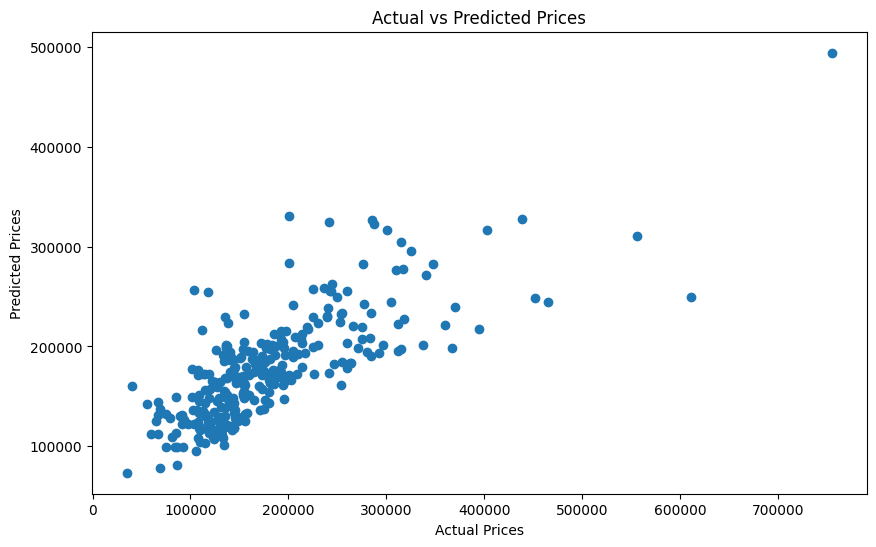

Model coefficients (weights for features):
GrLivArea: 63711.00780503604
TotRmsAbvGrd: -11965.582805417655
HalfBath: -404.39681721052875
Intercept: 181441.5419520548
Model saved to 'house_price_model.pkl'


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update with the path to where you saved train.csv)
df = pd.read_csv("train.csv")

# Display the first few rows of the dataset to understand its structure
print("Dataset loaded successfully.")
print(df.head())

# Selecting relevant features for prediction: square footage, number of bedrooms, and bathrooms
# 'GrLivArea' = Above grade (ground) living area in square feet
# 'TotRmsAbvGrd' = Total rooms above ground (including bathrooms)
# 'HalfBath' = Half bathrooms count
# We will use these as features for this example
features = ['GrLivArea', 'TotRmsAbvGrd', 'HalfBath']
target = 'SalePrice'

# Preprocessing: Handle missing values by dropping rows with any NaN values
df_cleaned = df[features + [target]].dropna()

# Define X (features) and y (target variable)
X = df_cleaned[features]
y = df_cleaned[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Feature scaling (standardization) for better performance of linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Optional: Plotting actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Optionally: Display the model coefficients and intercept
print("Model coefficients (weights for features):")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

print(f"Intercept: {model.intercept_}")

# Save the model if you need it for future predictions
import joblib
joblib.dump(model, 'house_price_model.pkl')
print("Model saved to 'house_price_model.pkl'")
